# Imports

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams['image.cmap'] = 'gray'

# What is NumPy

[![numpy](media\numpy.png)](https://numpy.org/)

# Generators

## Deterministic

### Standard

In [1]:
classic = list(range(10))
classic

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
np.array(classic)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
arr = np.arange(1, 10, 2)
arr

array([1, 3, 5, 7, 9])

### Multidimensional

In [7]:
multi = np.array([arr for _ in range(3)])
multi

array([[1, 3, 5, 7, 9],
       [1, 3, 5, 7, 9],
       [1, 3, 5, 7, 9]])

In [8]:
multi_3d = np.array([multi for _ in range(3)])
multi_3d

array([[[1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9]],

       [[1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9]],

       [[1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9]]])

### Types

In [9]:
arr.dtype

dtype('int32')

![dtypes](media\dtypes.png)

In [10]:
arr.astype(np.int8), np.array(arr, dtype=np.int8)

(array([1, 3, 5, 7, 9], dtype=int8), array([1, 3, 5, 7, 9], dtype=int8))

In [13]:
np.arange(120, 130).astype(np.int8)

array([ 120,  121,  122,  123,  124,  125,  126,  127, -128, -127],
      dtype=int8)

### Special

In [15]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [19]:
np.zeros((5, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [23]:
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [28]:
np.eye(5, 4, 2)

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Exercise: Gradient image

In [29]:
col = np.arange(200)
gradient = np.array([row * col for row in range(100)])
gradient.shape

(100, 200)

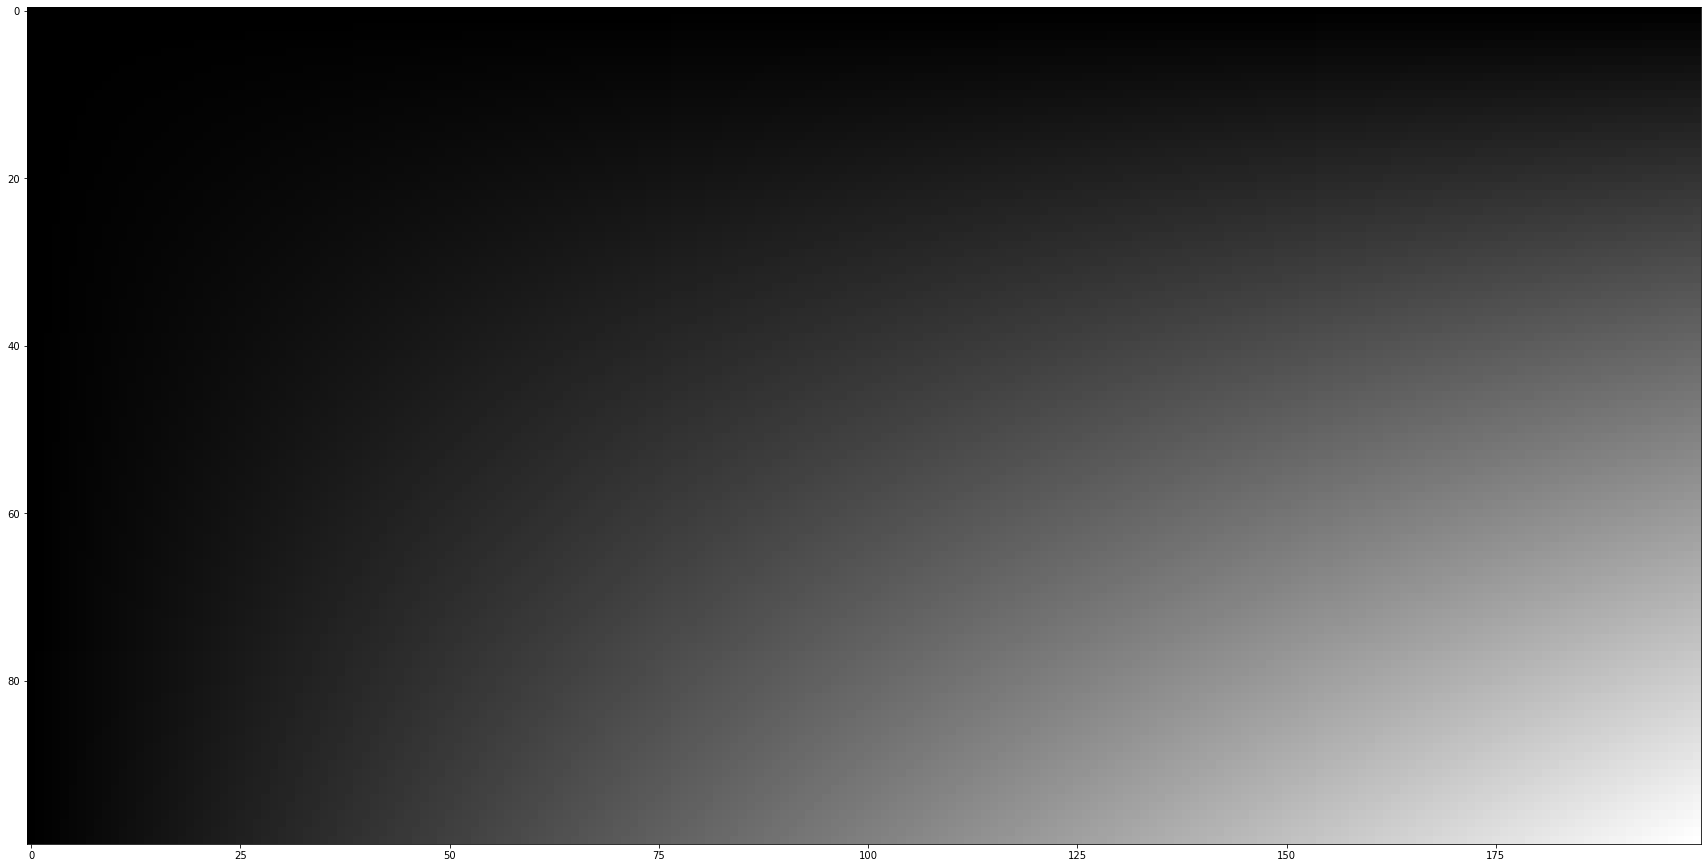

In [30]:
plt.imshow(gradient)

## Random

In [33]:
np.random.rand()

0.20657231025319478

In [35]:
np.random.rand(4, 3, 2)

array([[[0.33589493, 0.87095621],
        [0.9880656 , 0.61675553],
        [0.86134788, 0.78514893]],

       [[0.87724455, 0.02207794],
        [0.23199272, 0.97913256],
        [0.84346295, 0.95792248]],

       [[0.27745045, 0.76905137],
        [0.04446913, 0.03402047],
        [0.98480685, 0.10165586]],

       [[0.8150628 , 0.97303278],
        [0.94269936, 0.40560733],
        [0.39284649, 0.01378976]]])

In [38]:
np.random.randint(0, 10, (2, 3))

array([[7, 4, 1],
       [0, 0, 8]])

In [39]:
unif = np.random.uniform(0, 1, (100, 200))
unif.shape

(100, 200)

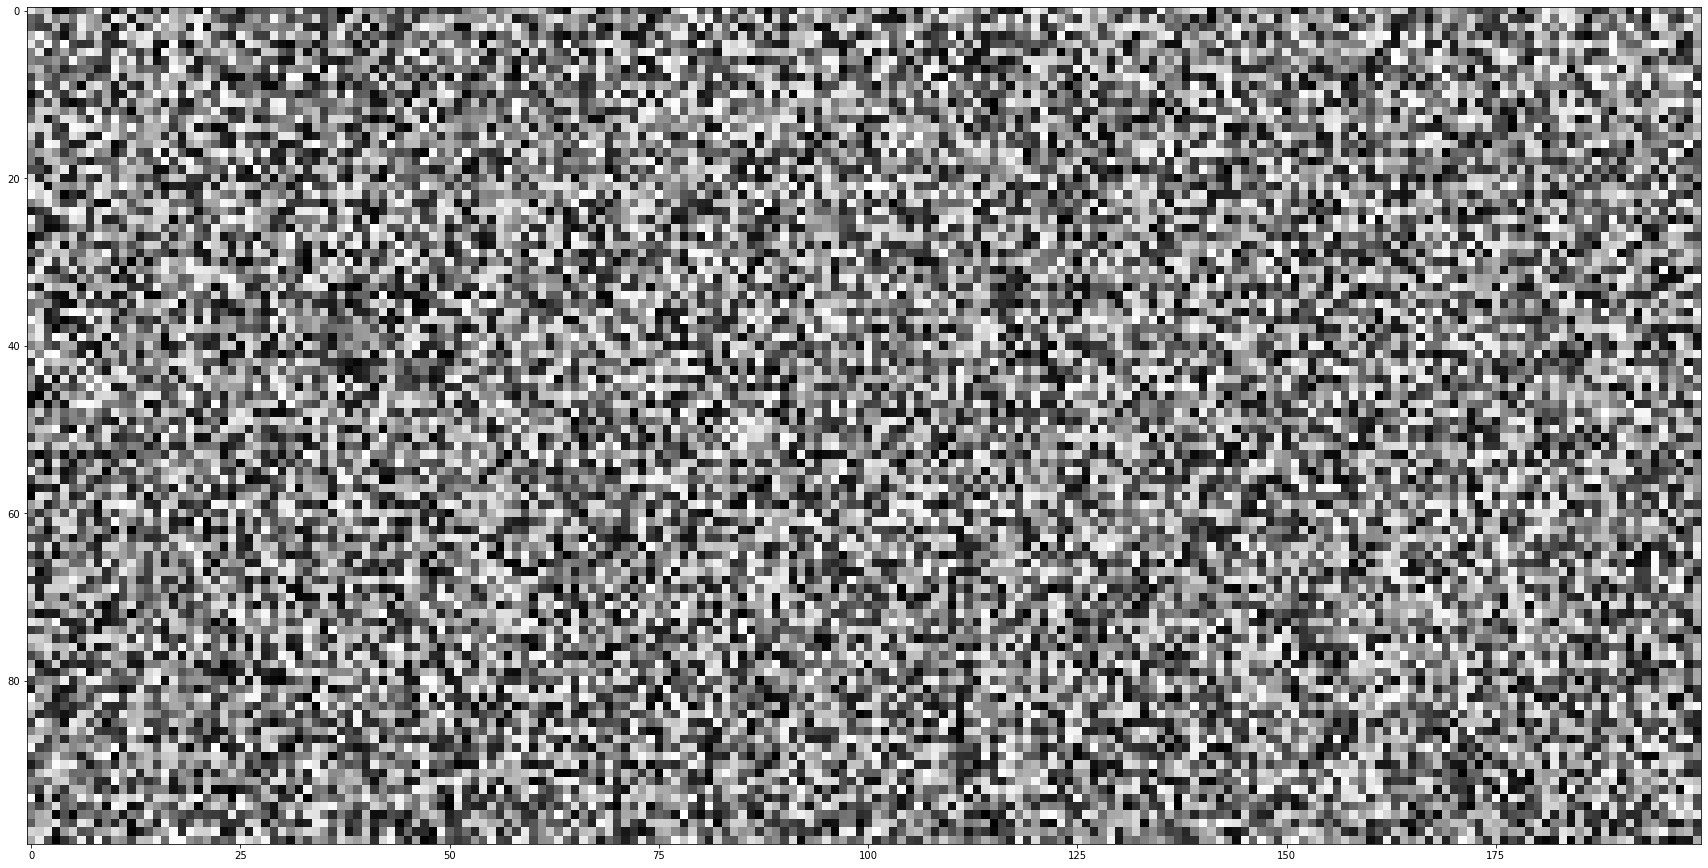

In [40]:
plt.imshow(unif)

In [43]:
normal = np.random.randn(100, 200) * 2 + 1
normal.shape

(100, 200)

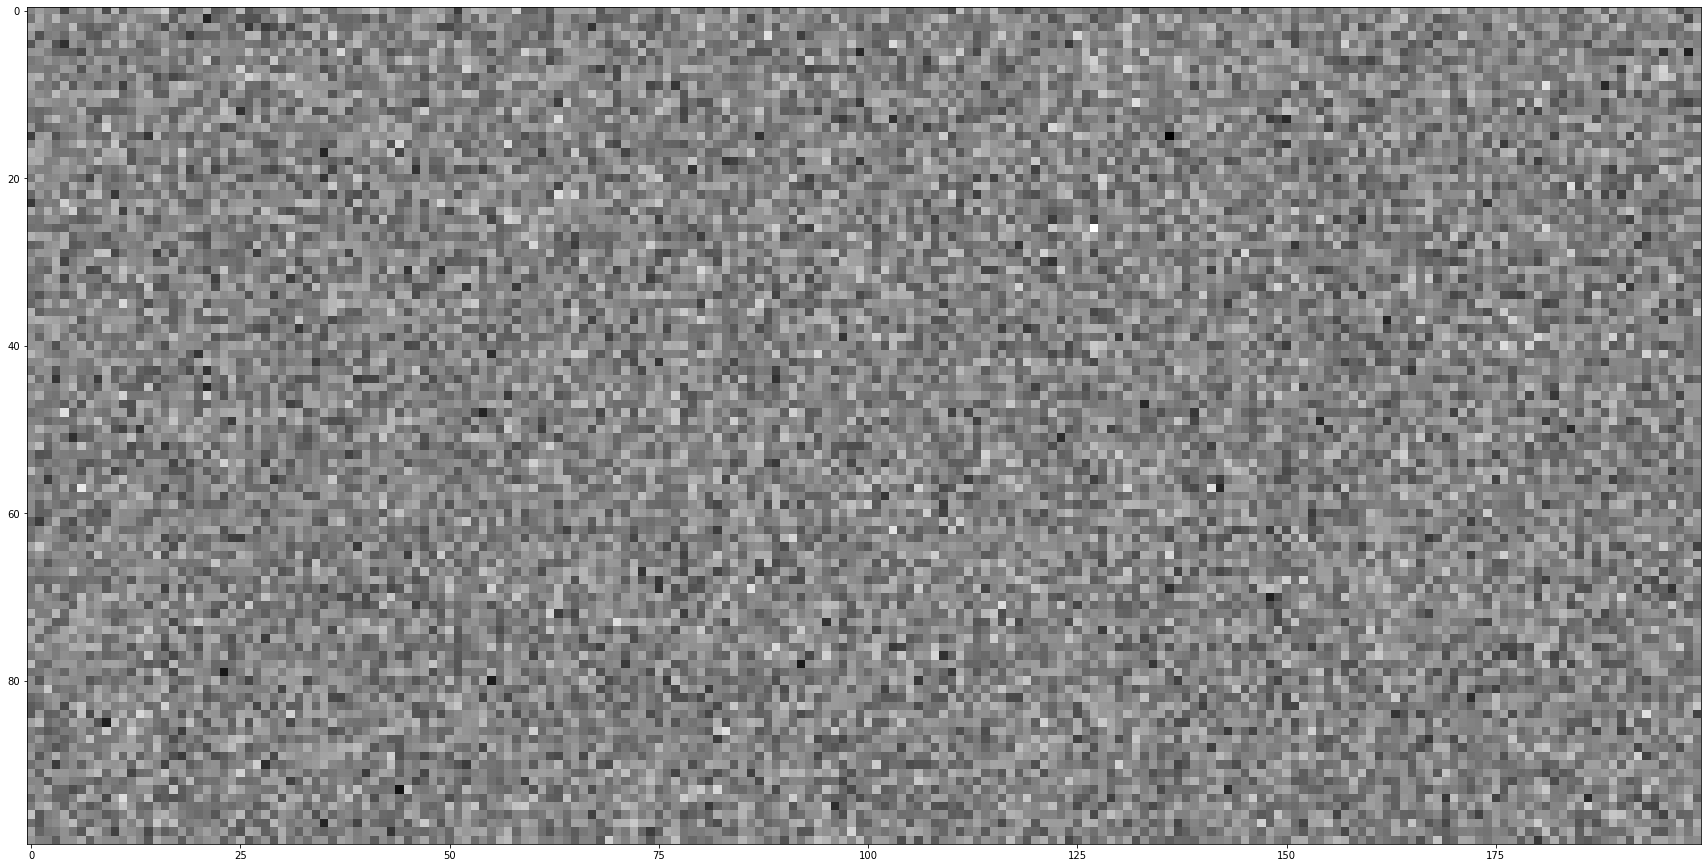

In [44]:
plt.imshow(normal)

#### Exercise: Random color gradient

![rgb](media\rgb.png)

In [45]:
random_color = np.random.uniform(0, 1, 3)
random_color.shape

(3,)

In [46]:
random_gradient = np.array([[random_color * intesity for intesity in column] for column in gradient])
random_gradient.shape

(100, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


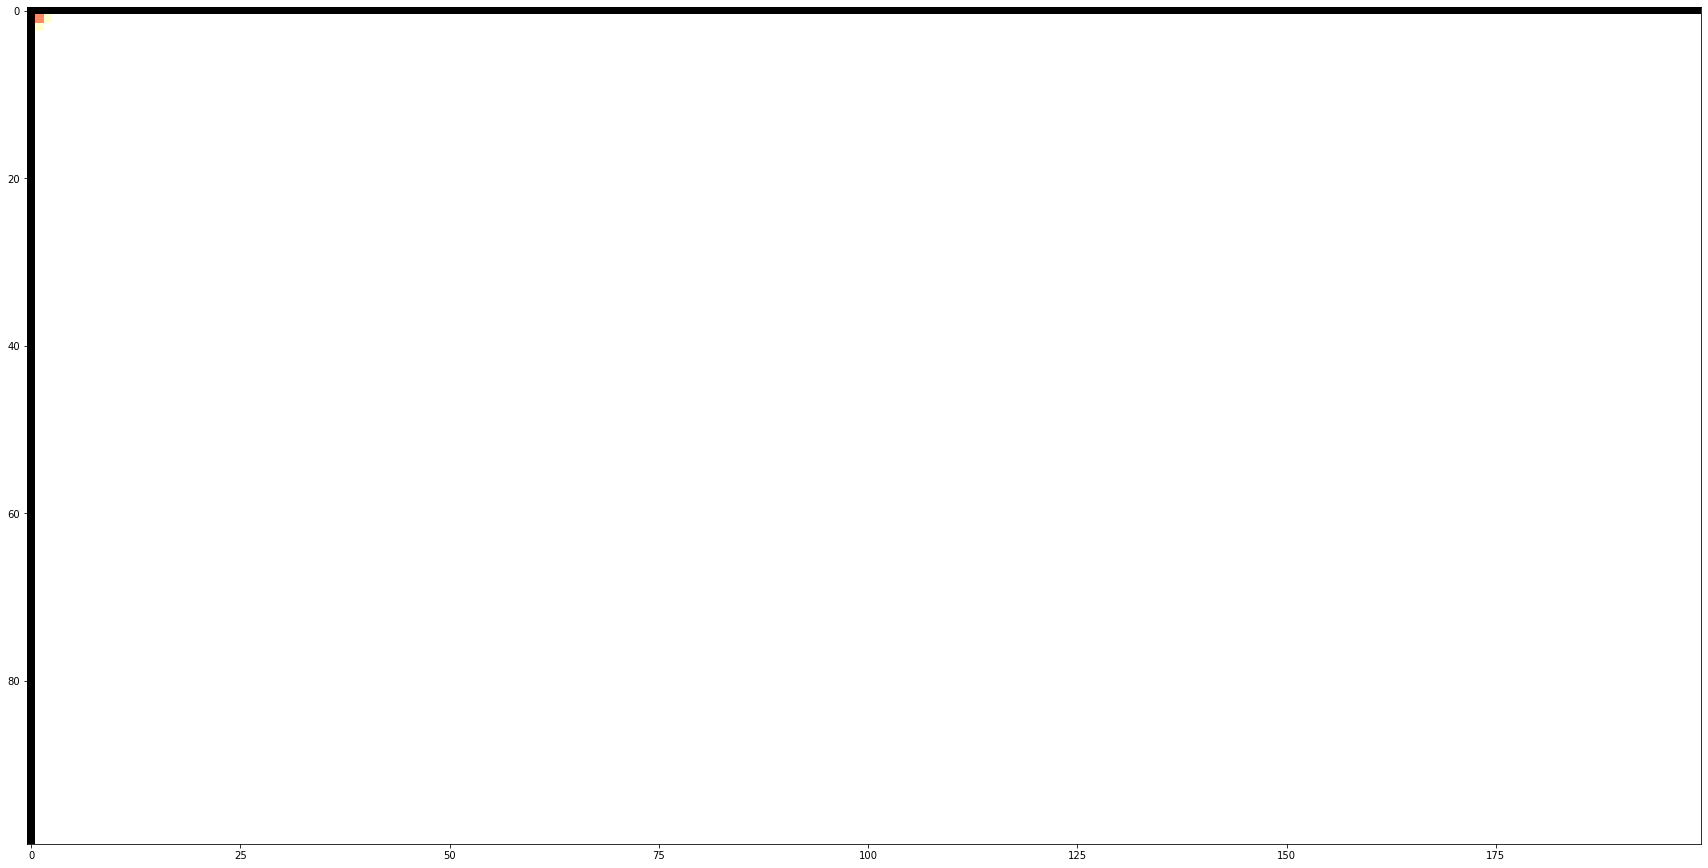

In [47]:
plt.imshow(random_gradient)

Min-max scaling
$$\widetilde{x}=\frac{x-\min{x}}{\max{x}-\min{x}}$$

In [48]:
min_max = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
scaled_gradient = min_max(random_gradient)

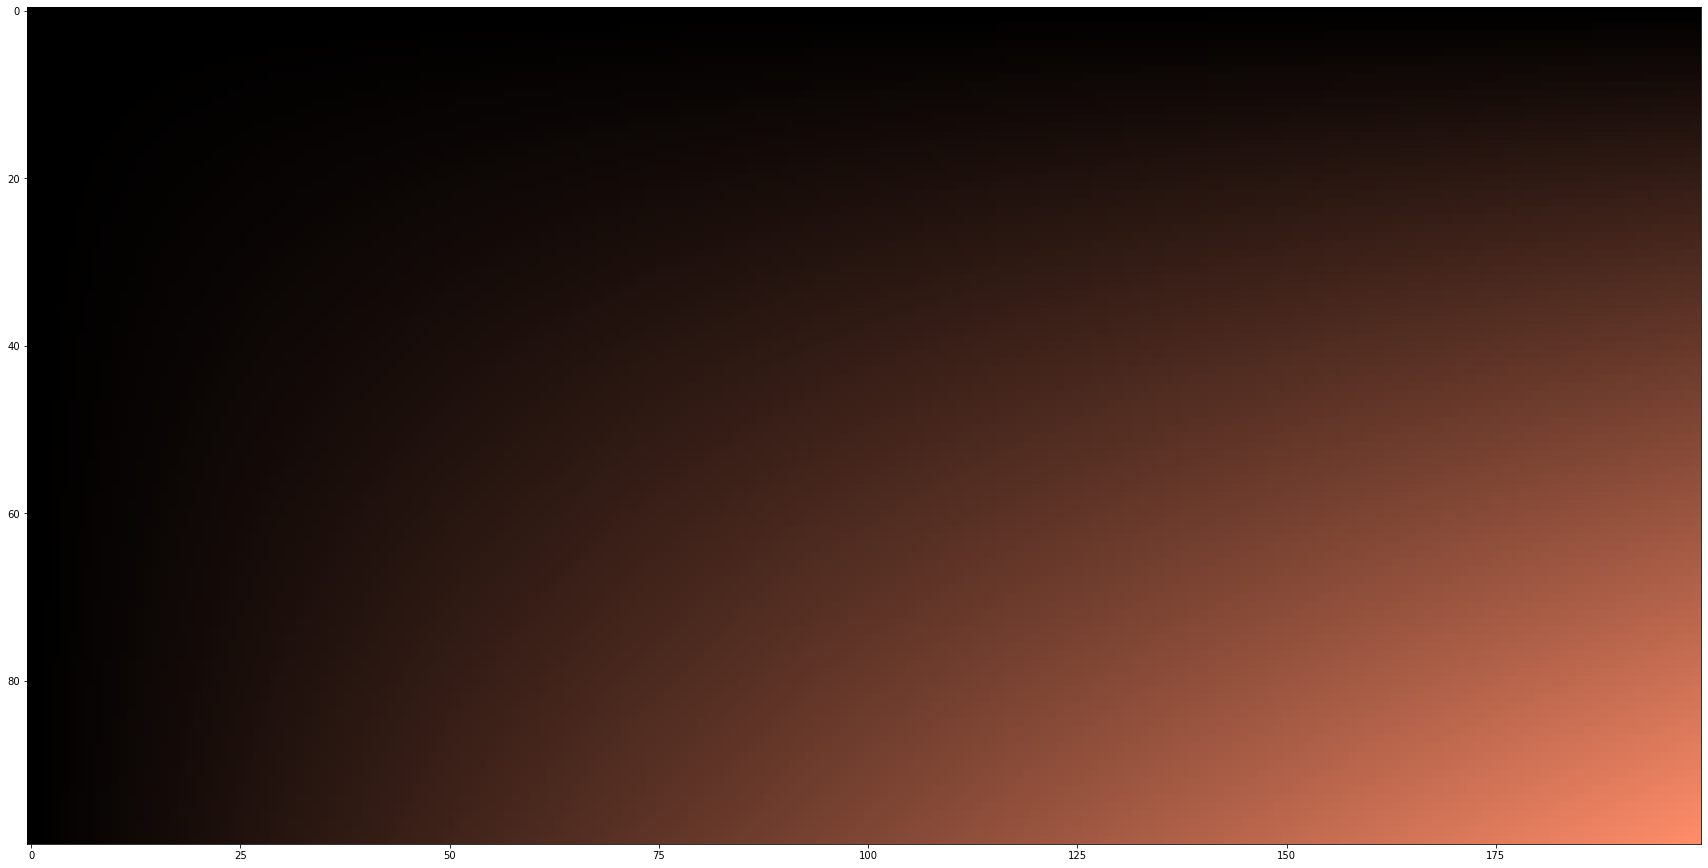

In [49]:
plt.imshow(scaled_gradient)

# Shapes

In [54]:
path = os.path.join('media', 'DIY.jpg')

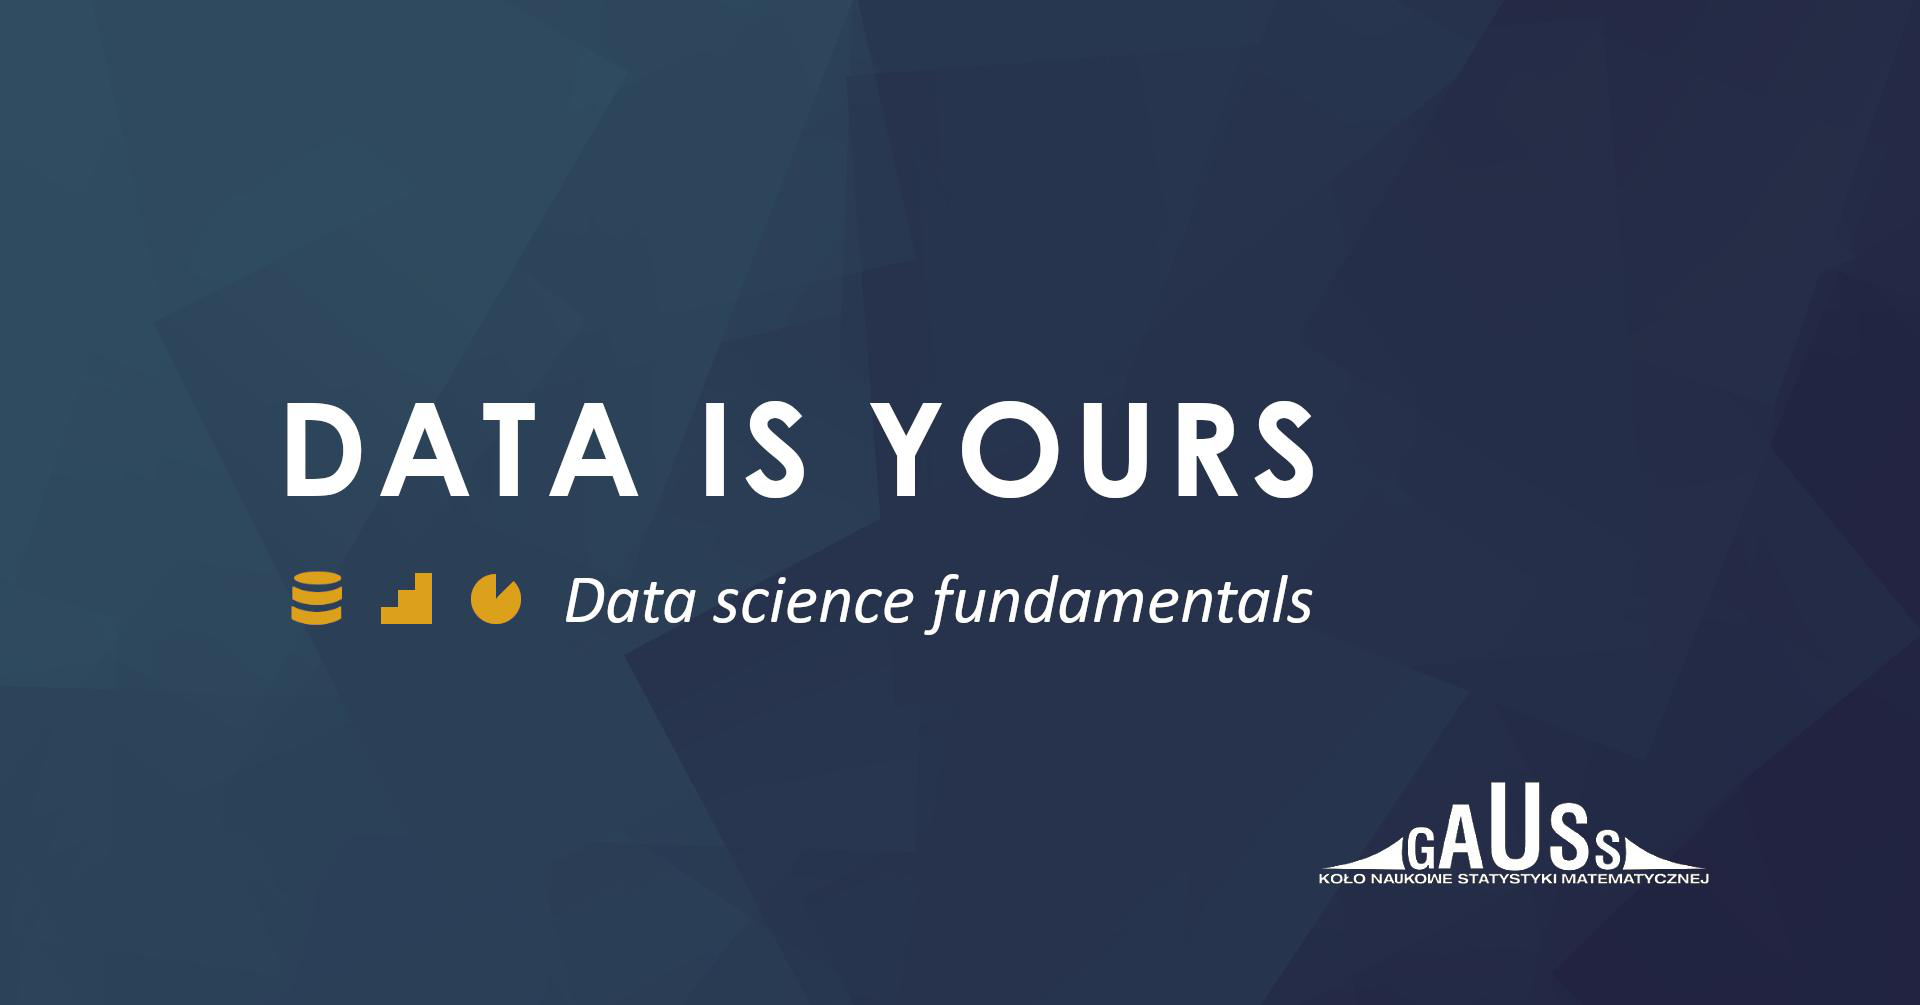

In [55]:
image = Image.open(path)
image

In [56]:
image_array = np.array(image)
image_array.shape

(1005, 1920, 3)

## Reshaping

In [57]:
transposed_image = image_array.T
transposed_image.shape

(3, 1920, 1005)

In [59]:
transposed_image = np.transpose(image_array, (1, 0, 2))
transposed_image.shape

(1920, 1005, 3)

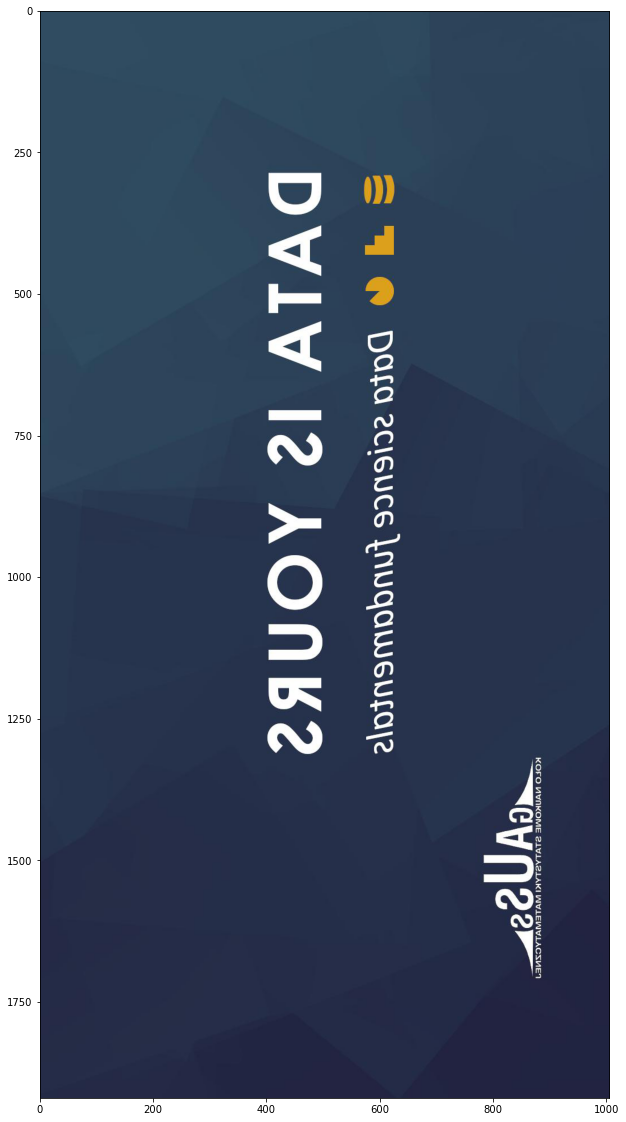

In [60]:
plt.imshow(transposed_image)

![reshape](media\reshape.webp)

In [61]:
reshaped_image = image_array.reshape(-1, image_array.shape[1] * 3, 3)
reshaped_image.shape

(335, 5760, 3)

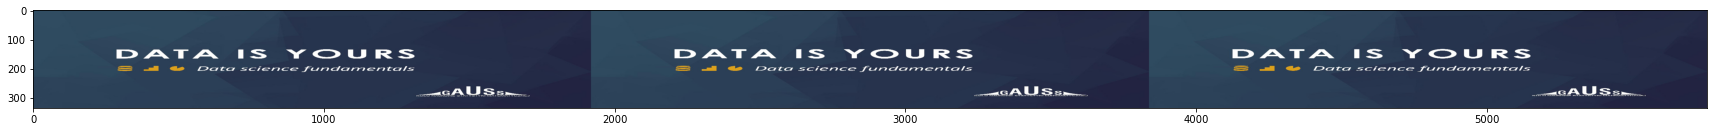

In [62]:
plt.imshow(reshaped_image)

In [63]:
reshaped_image = image_array.reshape(2 * image_array.shape[0], -1, 3)
reshaped_image.shape

(2010, 960, 3)

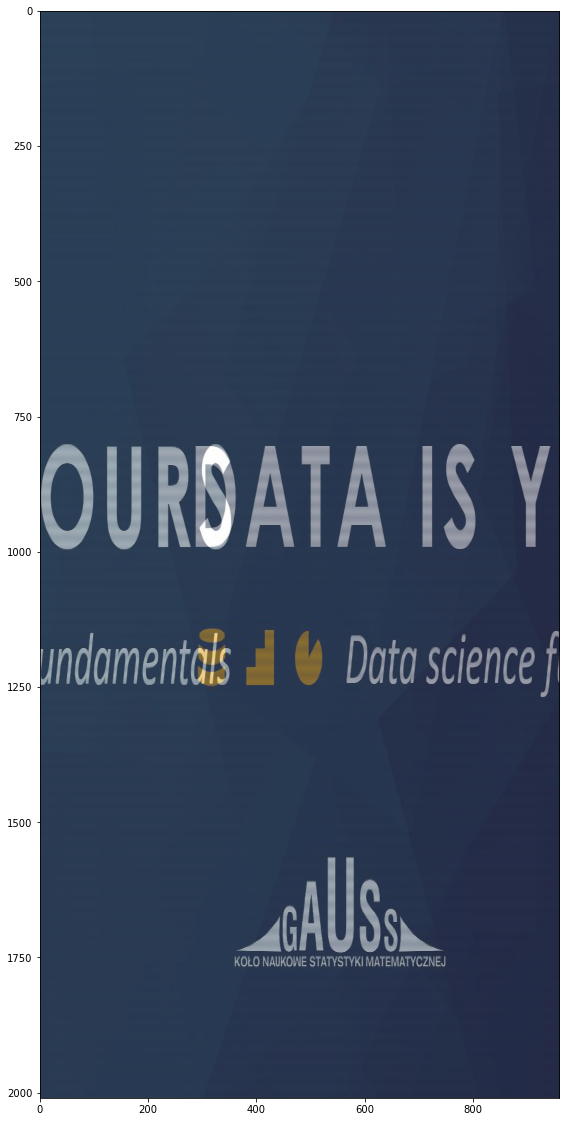

In [64]:
plt.imshow(reshaped_image)

In [65]:
A = np.arange(5)
A.shape, A.reshape(-1, 1).shape

((5,), (5, 1))

In [68]:
A + A.reshape(-1, 1)

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [71]:
A.reshape(-1, 1) @ A.reshape(1, -1)

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [73]:
flat = image_array.flatten()
flat.shape, image_array.size

((5788800,), 5788800)

## Slicing

In [74]:
image_array.shape

(1005, 1920, 3)

In [75]:
grayscale = image_array.mean(axis=2)
grayscale.shape

(1005, 1920)

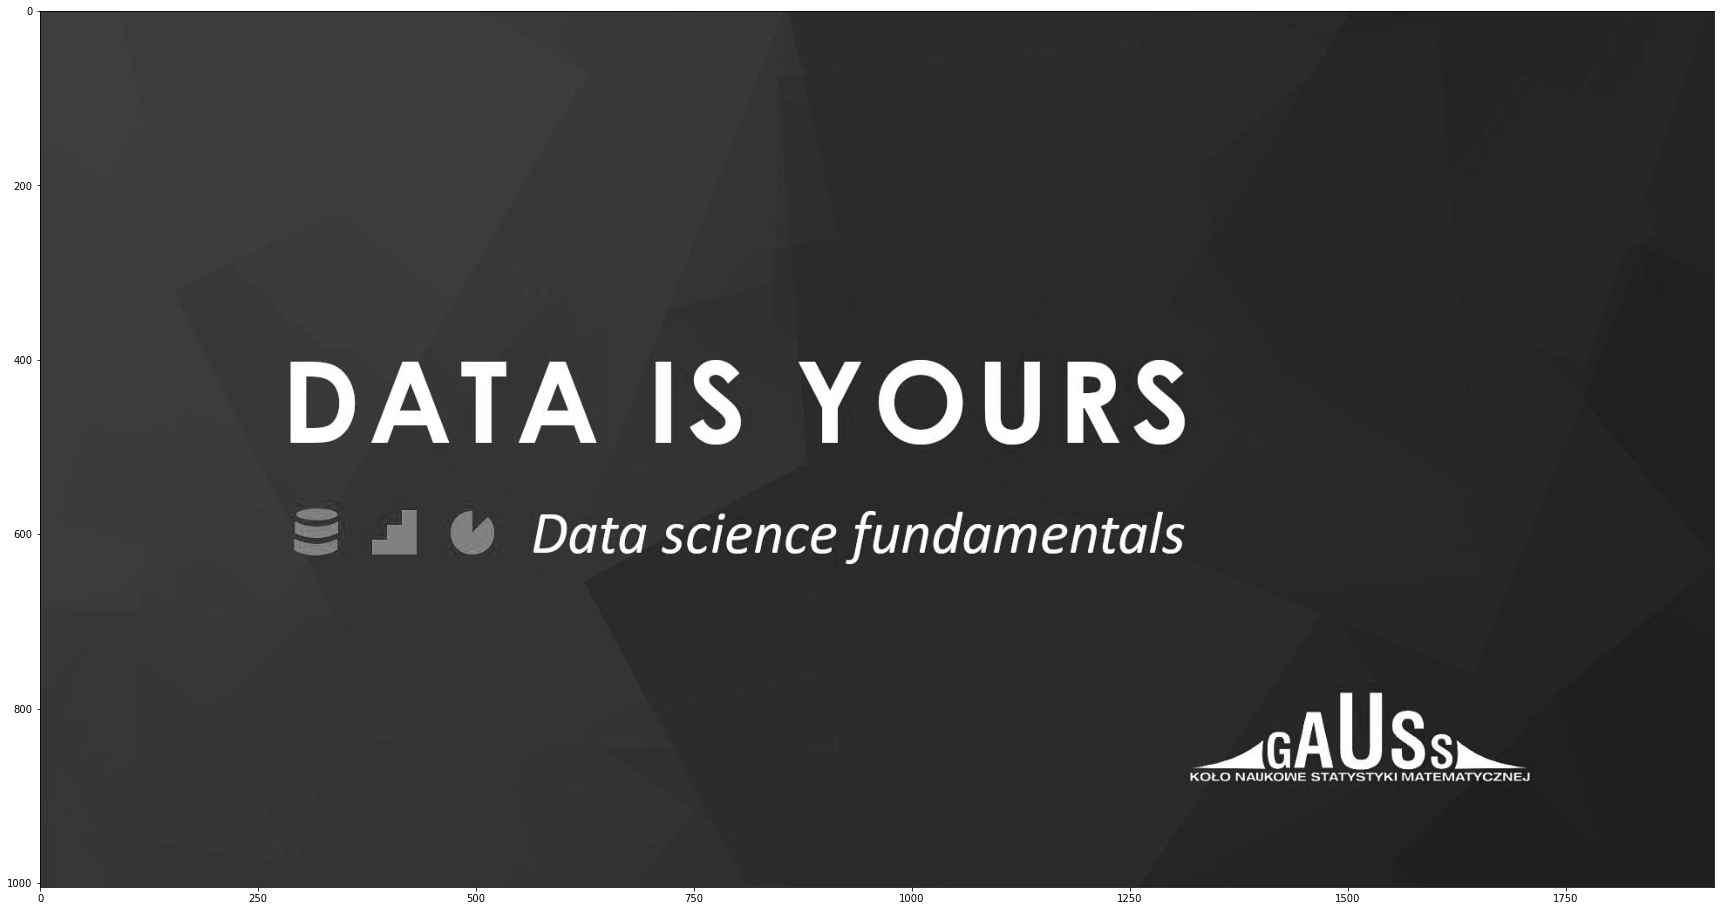

In [76]:
plt.imshow(grayscale)

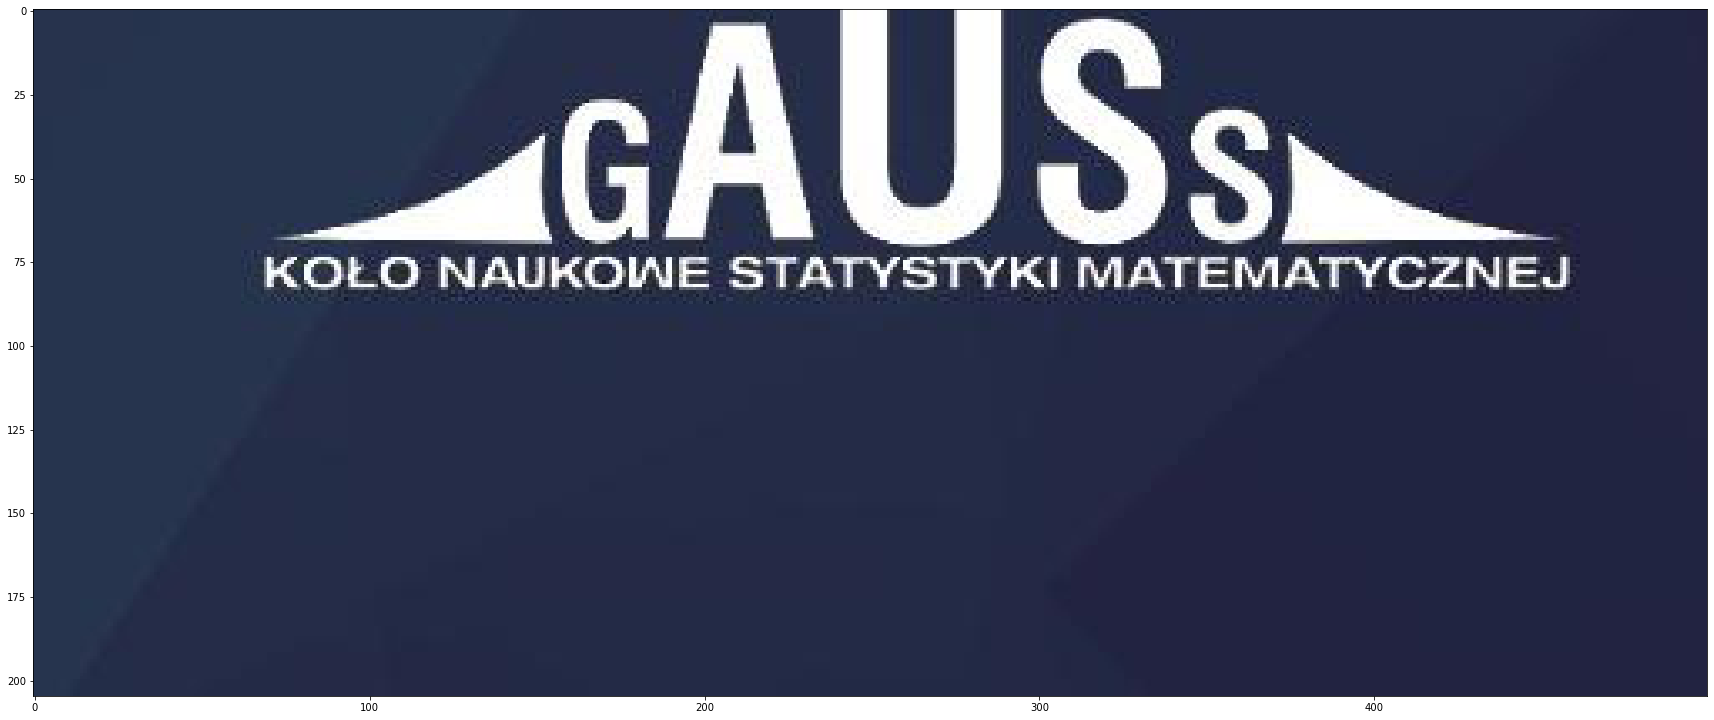

In [79]:
sub_image = image_array[800:, 1250:1750, :]
plt.imshow(sub_image)

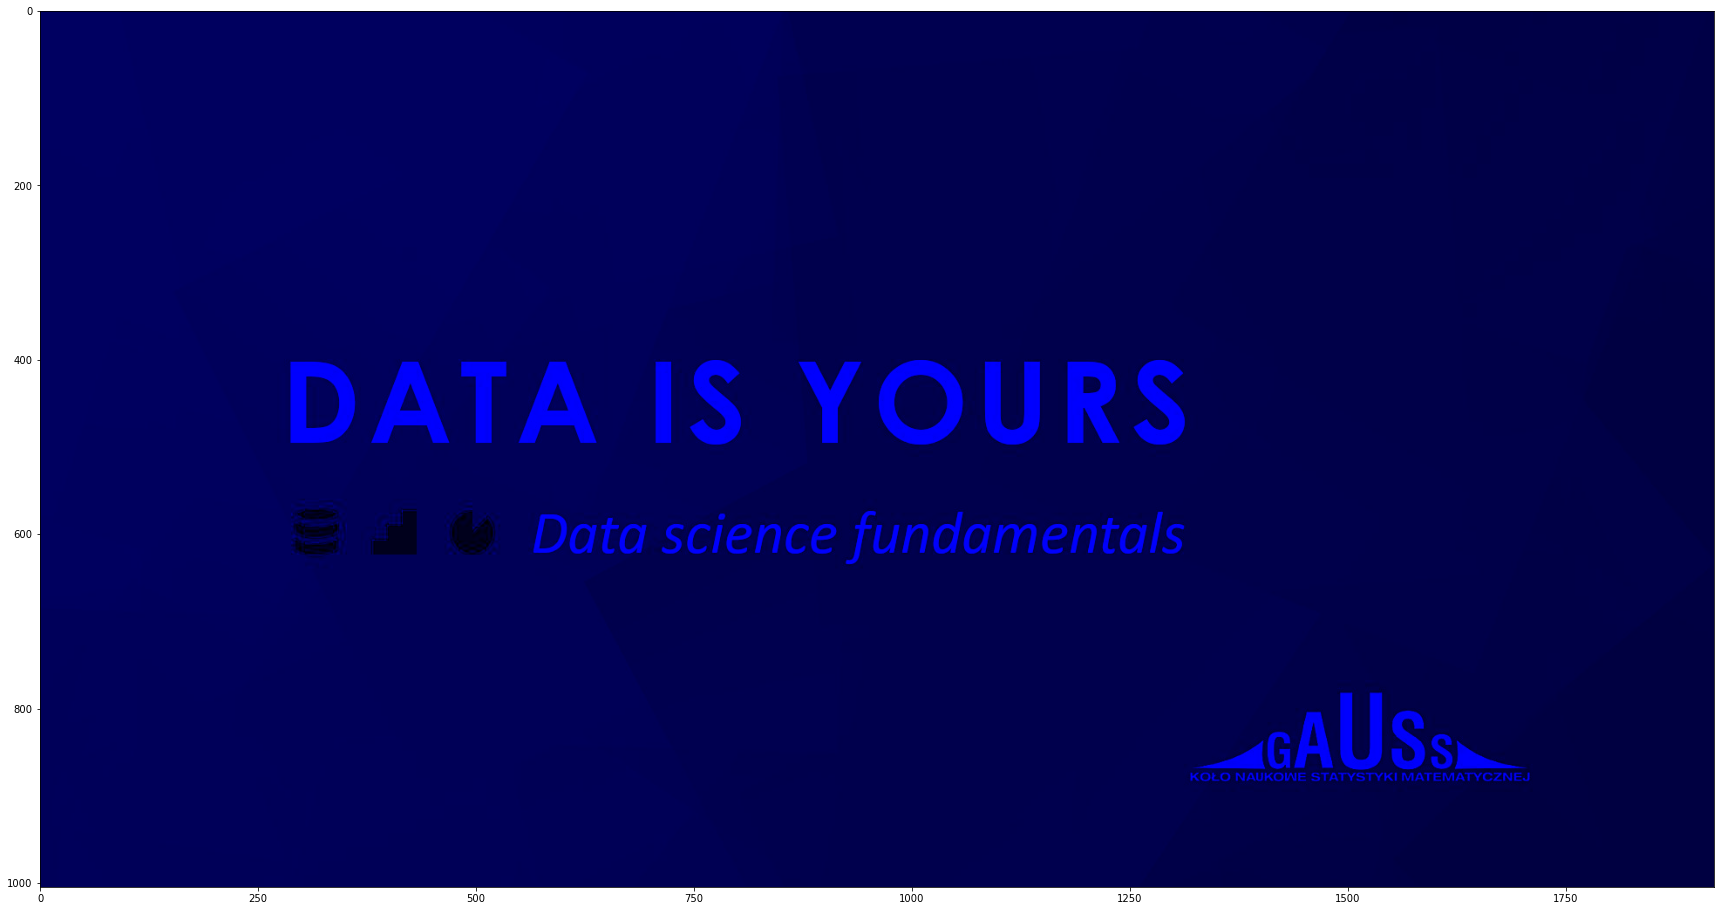

In [81]:
one_color = image_array.copy()
one_color[:, :, :-1] = 0
plt.imshow(one_color)

## Stacking

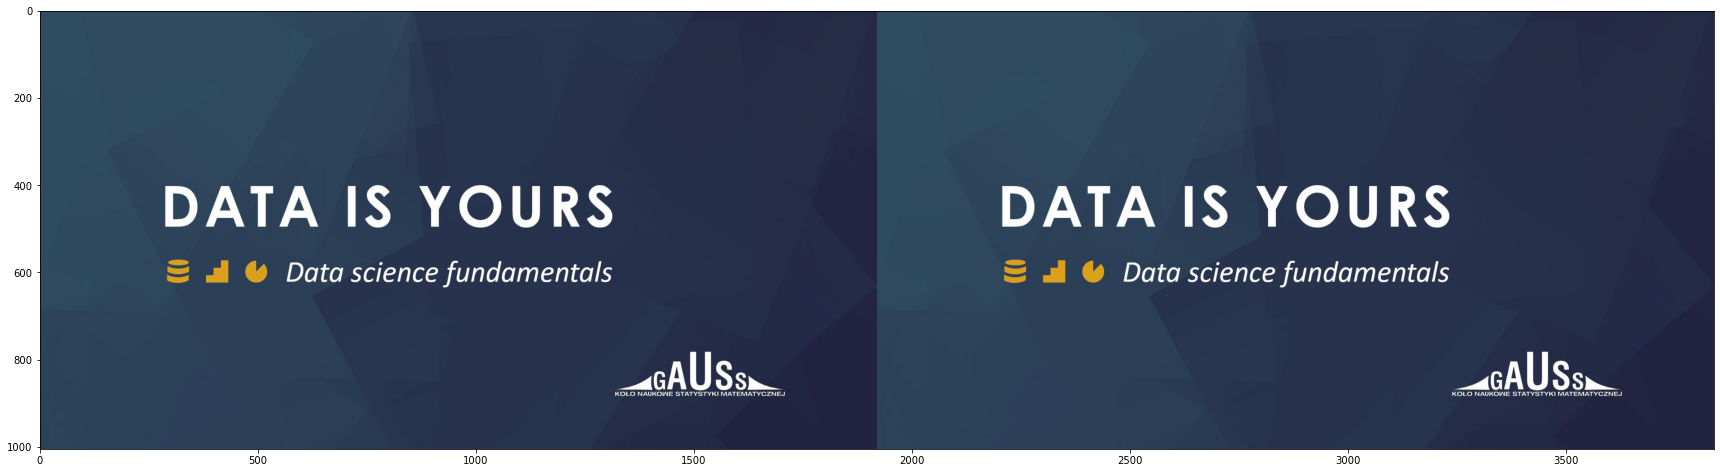

In [82]:
plt.imshow(np.hstack((image_array, image_array)))

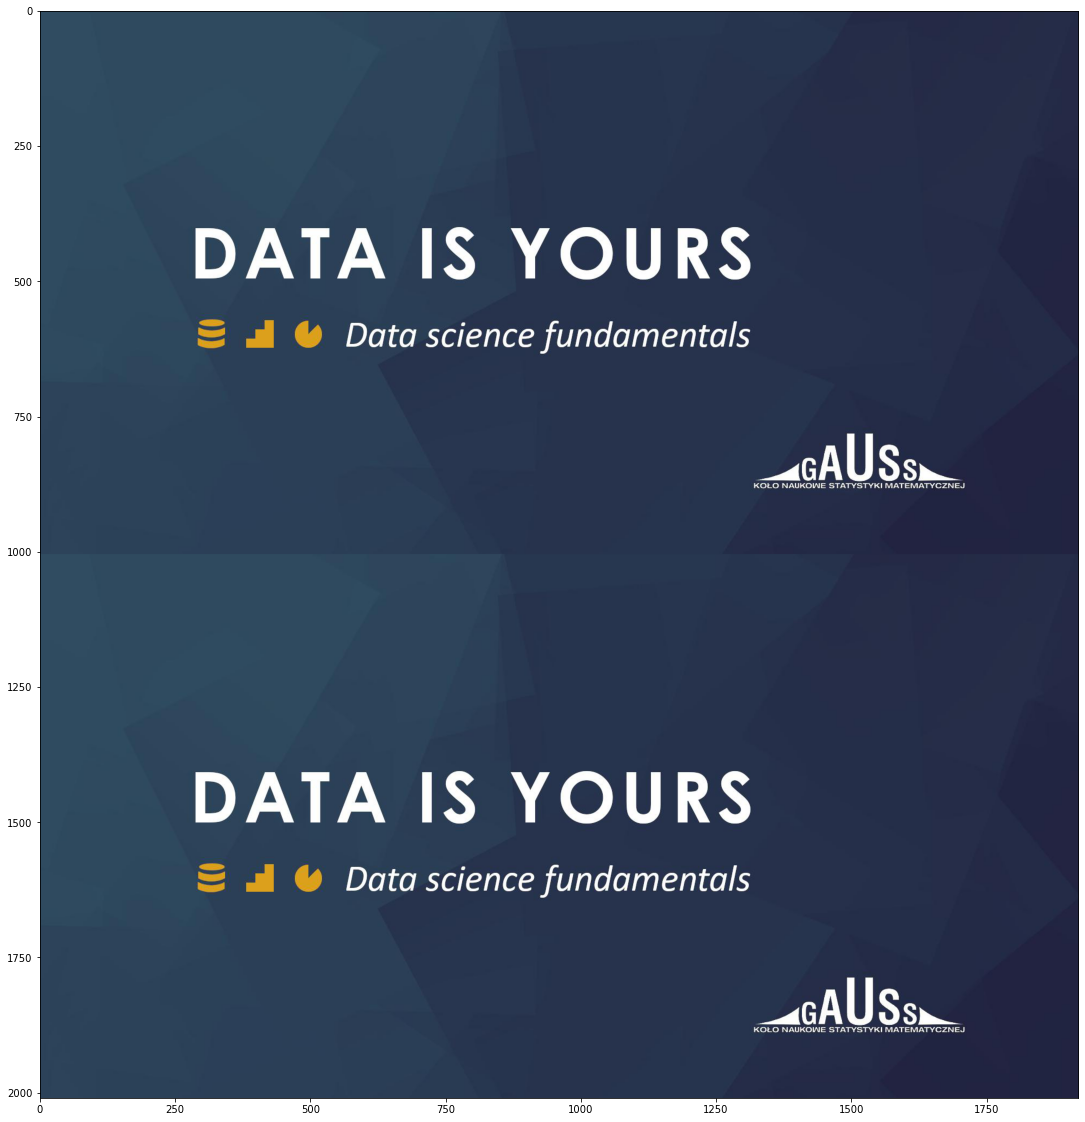

In [83]:
plt.imshow(np.vstack((image_array, image_array)))

## Masking

In [86]:
grayscale > np.mean(grayscale)

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

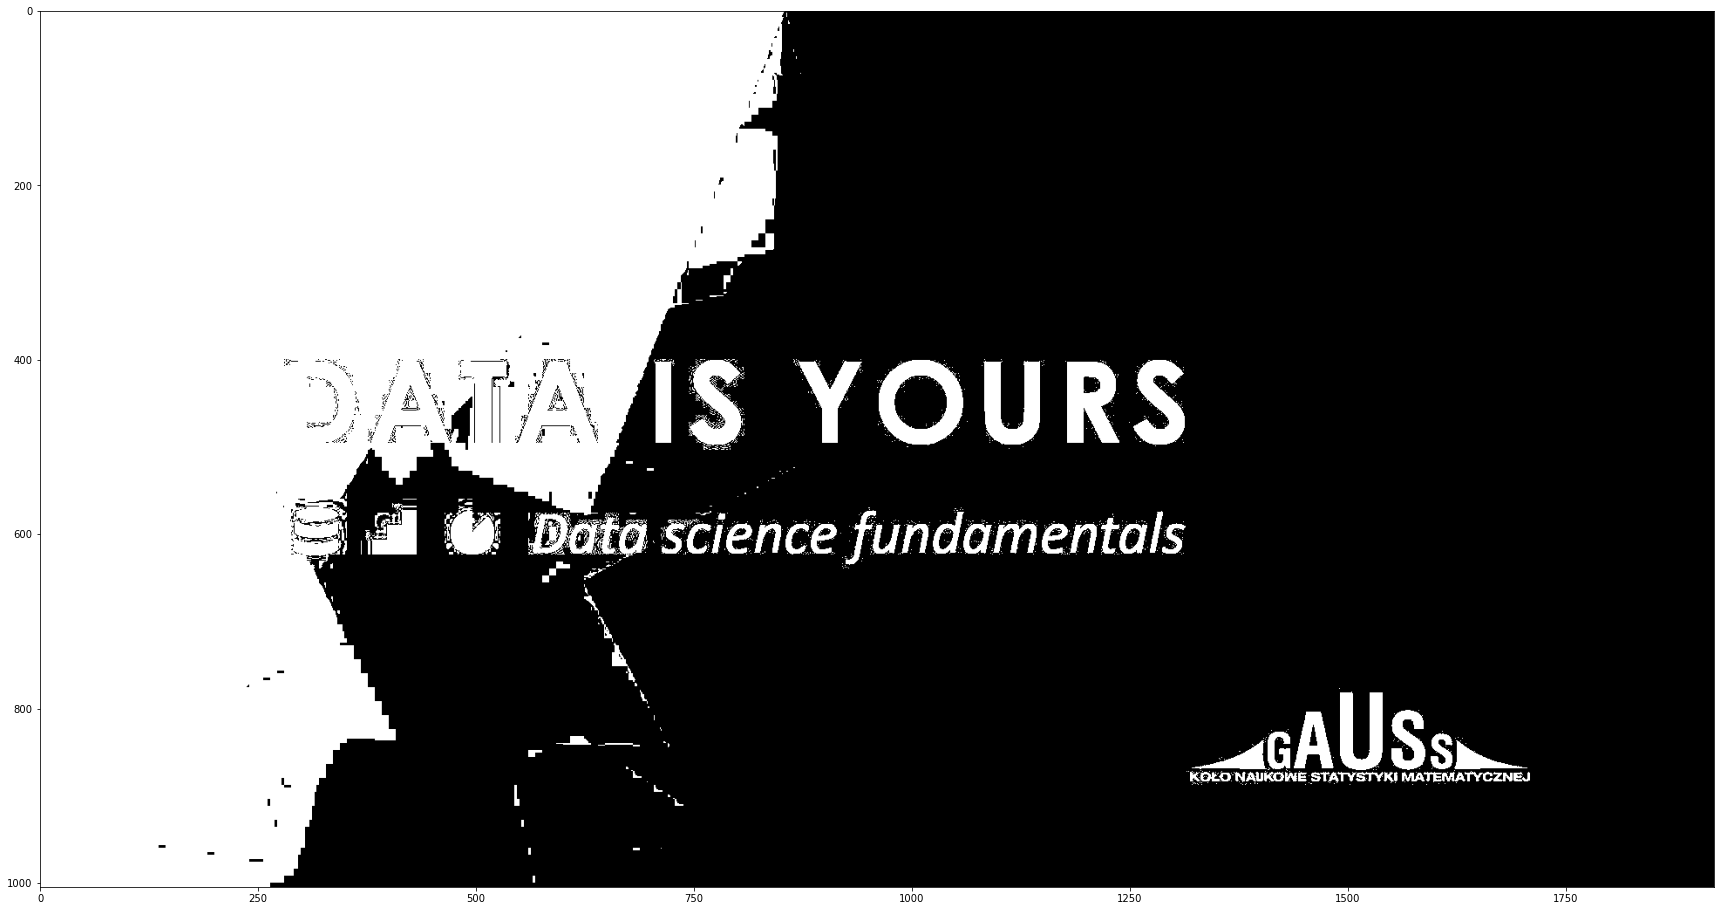

In [85]:
plt.imshow(grayscale > np.mean(grayscale))

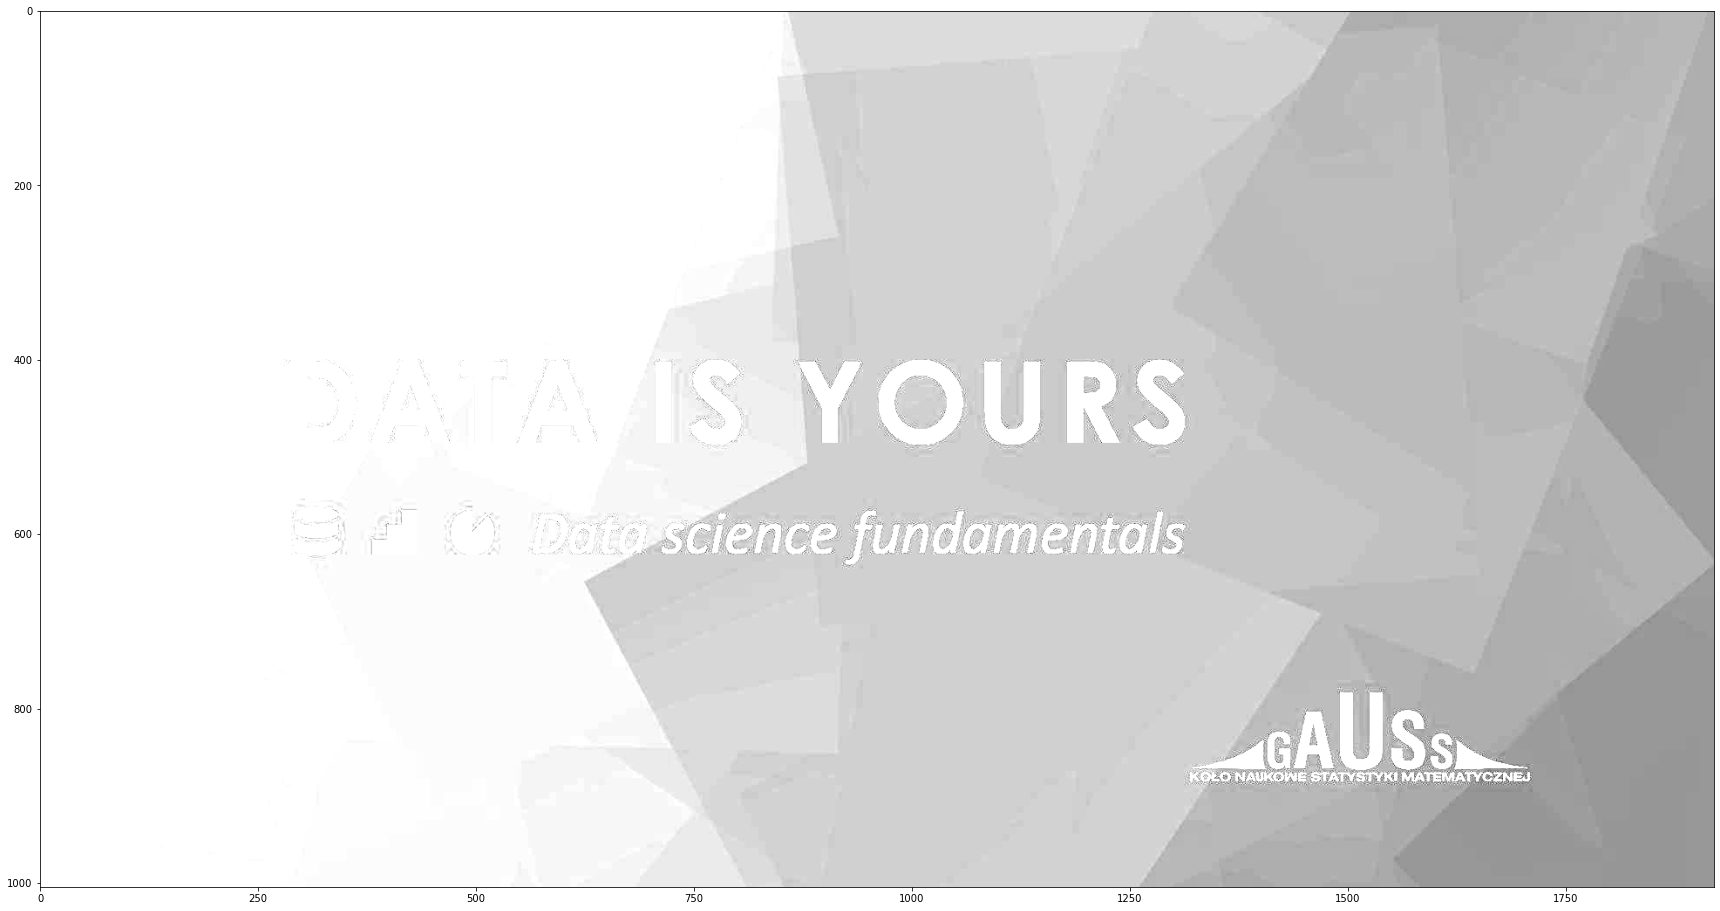

In [87]:
limited_image = grayscale.copy()
limited_image[limited_image > np.mean(limited_image)] = np.mean(limited_image)
plt.imshow(limited_image)

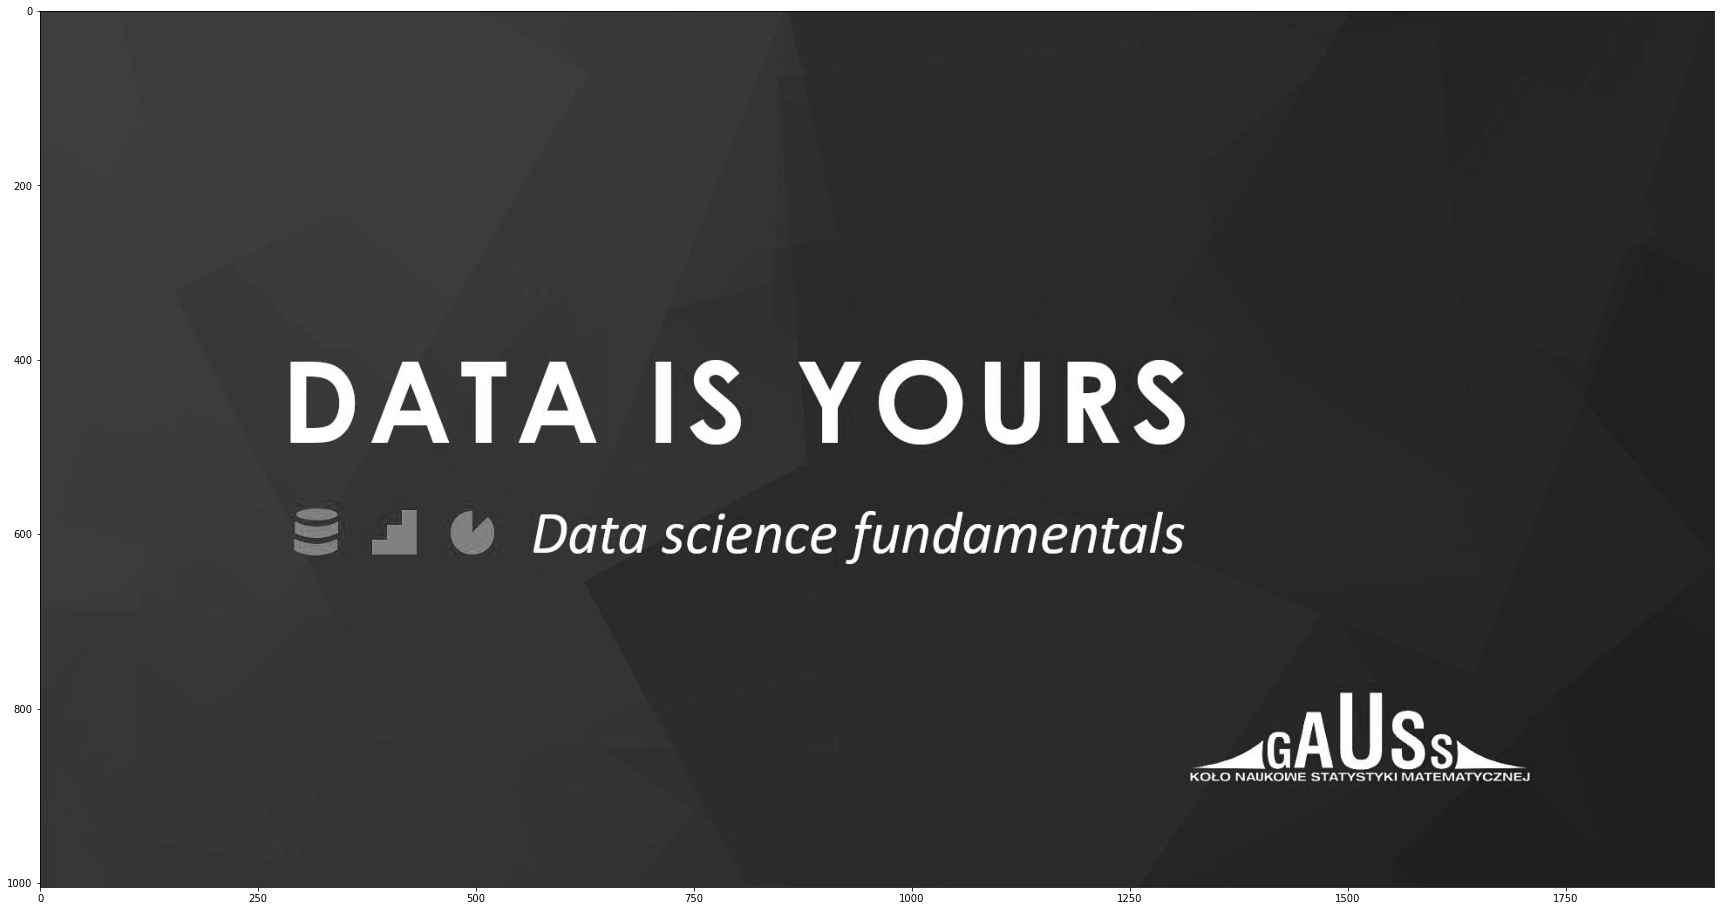

In [88]:
plt.imshow(grayscale)

#### Exercise: Estimate $\pi$

In [89]:
n = 10000
unit = np.linspace(-1, 1, n)

In [90]:
radii = unit ** 2 + unit.reshape(-1, 1) ** 2

In [91]:
radii[radii < 1].size / radii.size * 4

3.1409544

# Computation

## Basic Operations

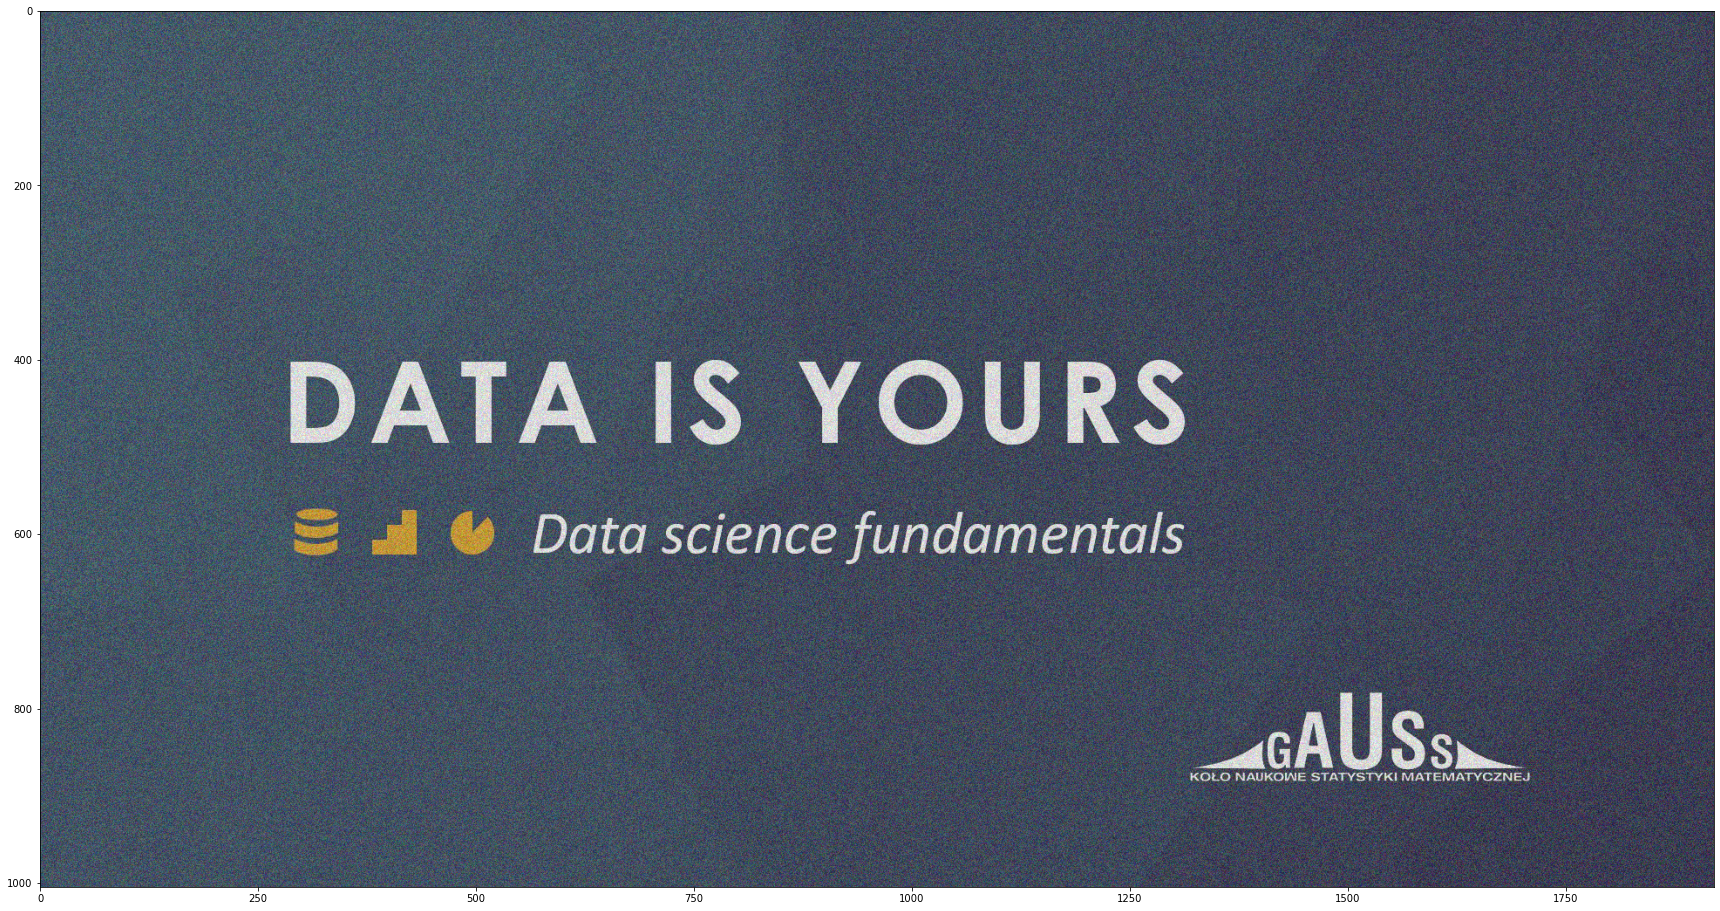

In [93]:
noised = image_array + np.random.uniform(0, 100, image_array.shape)
plt.imshow(min_max(noised))

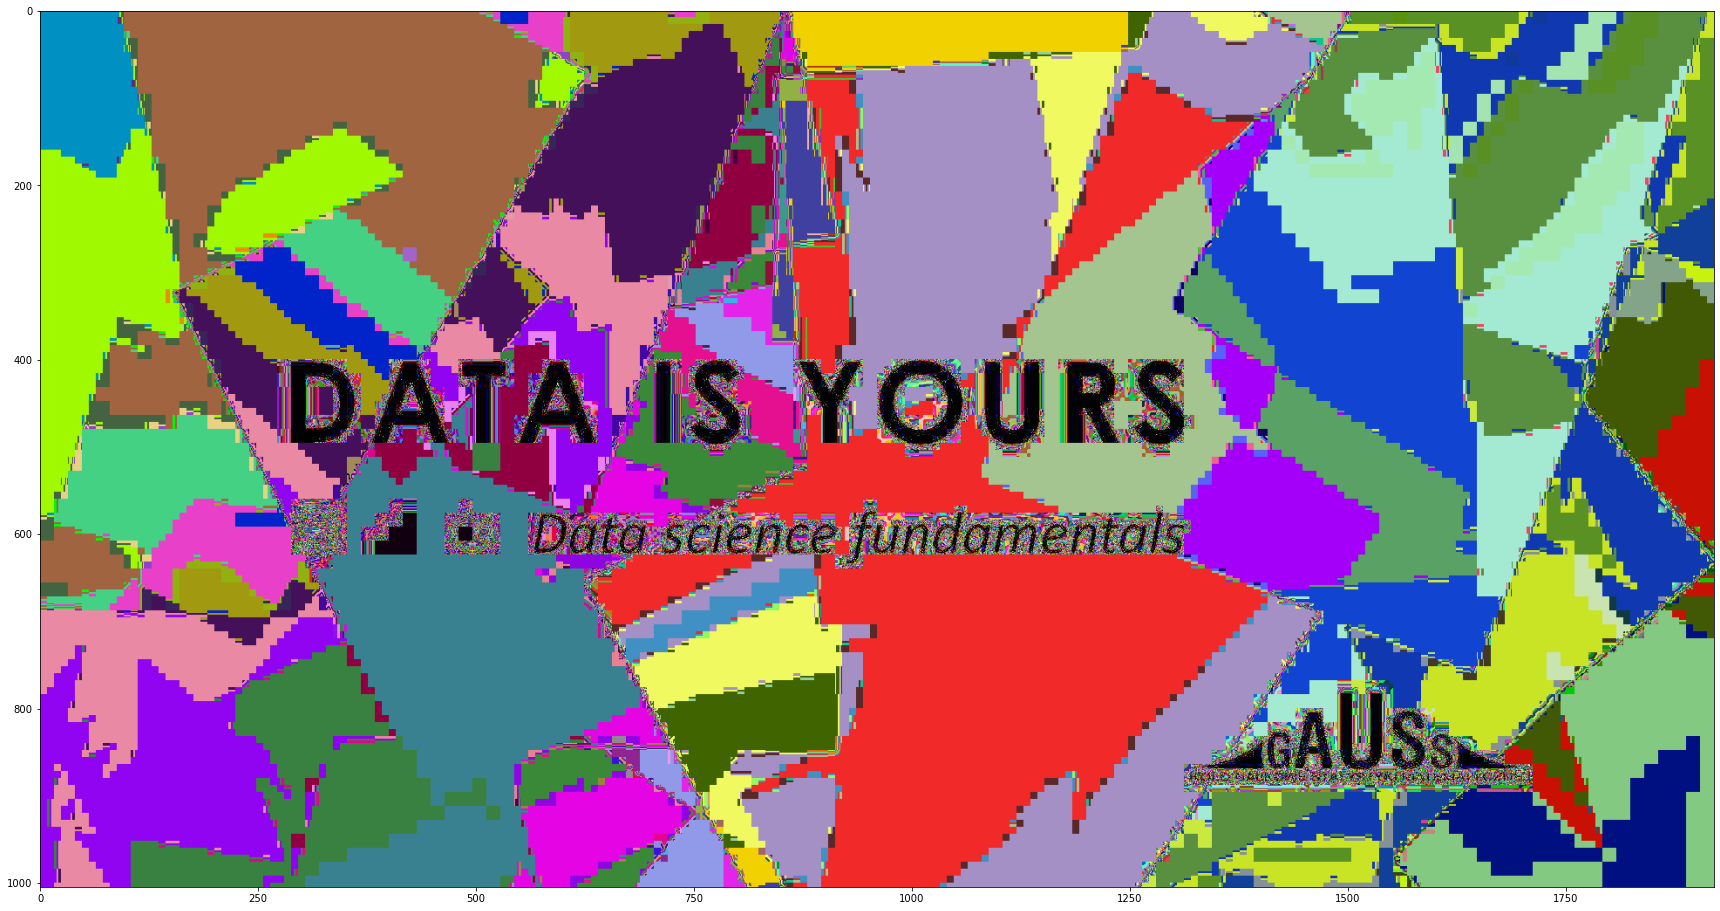

In [99]:
plt.imshow(image_array ** 2)

## Functions

In [100]:
x = np.ones(3)
np.sqrt(x @ x.T)

1.7320508075688772

$$g(x)=\frac{1}{\sigma\sqrt{2\,\pi}}\exp^{-\frac{x}{2\,\sigma^2}}$$

In [103]:
n = 10
unit = np.linspace(-1, 1, n)
radii = unit ** 2 + unit.reshape(-1, 1) ** 2

In [104]:
gaussian = 1 / np.sqrt(2 * np.pi) * np.exp(- radii / 2)

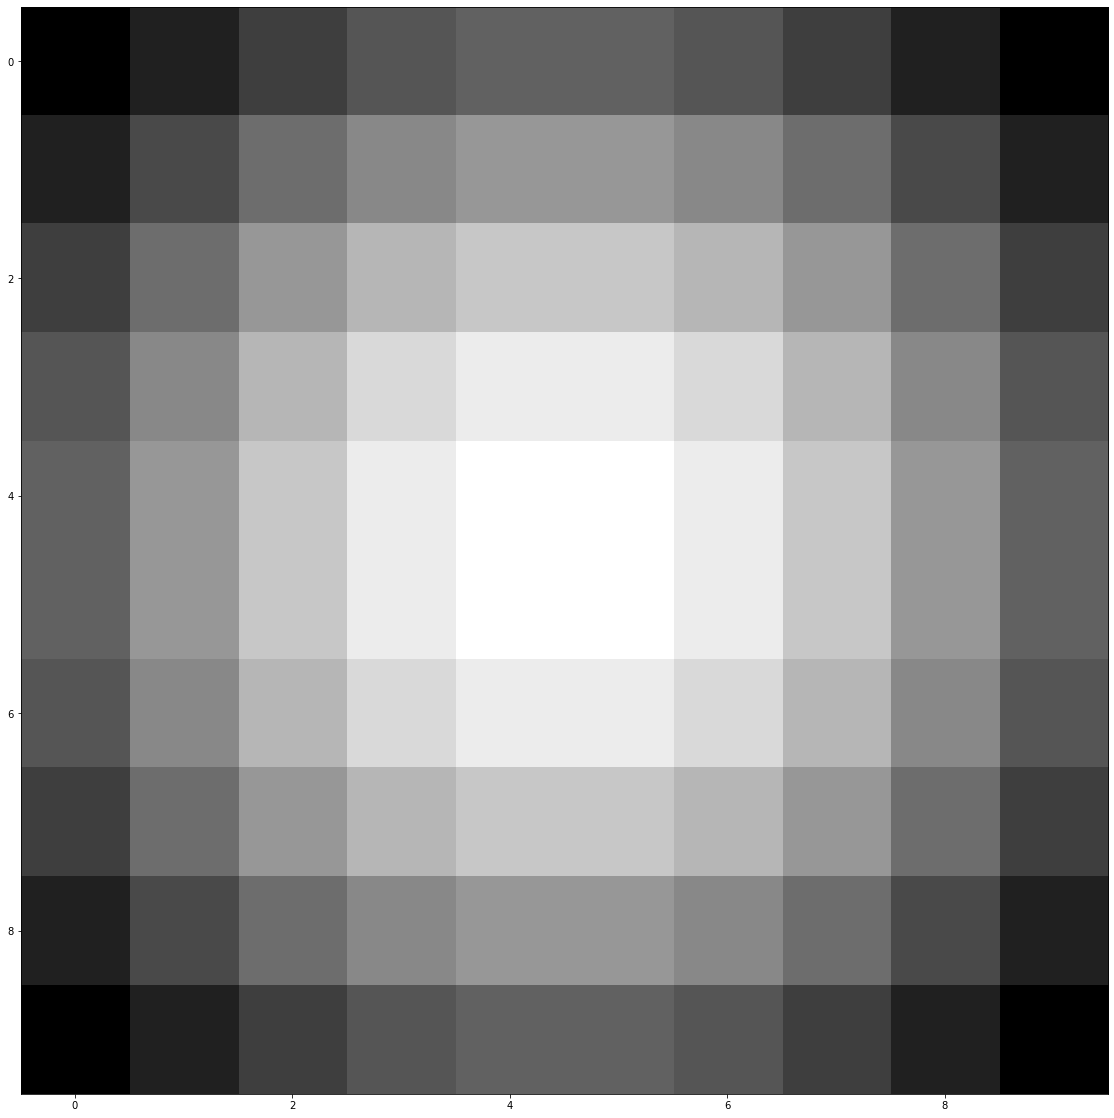

In [105]:
plt.imshow(gaussian)

## Statistics

In [108]:
sample = np.random.randn(1000)
np.mean(sample), np.std(sample), np.median(sample)

(-0.004919000232134944, 0.9974465885274035, -0.0015782145874711803)

In [109]:
sample_2d = np.random.randn(10, 100)
np.mean(sample_2d, axis=1)

array([ 0.01410665, -0.05848839, -0.10245973,  0.00397407,  0.09863502,
        0.00683959,  0.04550143,  0.12094874, -0.22786033, -0.22697431])

## Handling NaNs

In [114]:
sample_nan = np.random.randn(1000)
sample_nan[0] = np.nan
np.mean(sample_nan), np.std(sample_nan), np.median(sample_nan)

(nan, nan, nan)

In [115]:
np.nanmean(sample_nan), np.nanstd(sample_nan), np.nanmedian(sample_nan)

(0.06296953213578314, 1.0081247257830597, 0.07610520974400034)

#### Exercise: Smooth image using convolution

![convolution](media\convolution.png)

In [116]:
one_pixel = lambda sub, kernel: sum(np.diag(sub @ kernel)) / sub.size

In [117]:
sub_height, sub_width = gaussian.shape
height, width = grayscale.shape
smooth = np.array([[one_pixel(grayscale[i-sub_height:i, j-sub_width:j], gaussian) for j in range(sub_width, width)]
                  for i in range(sub_height, height)])

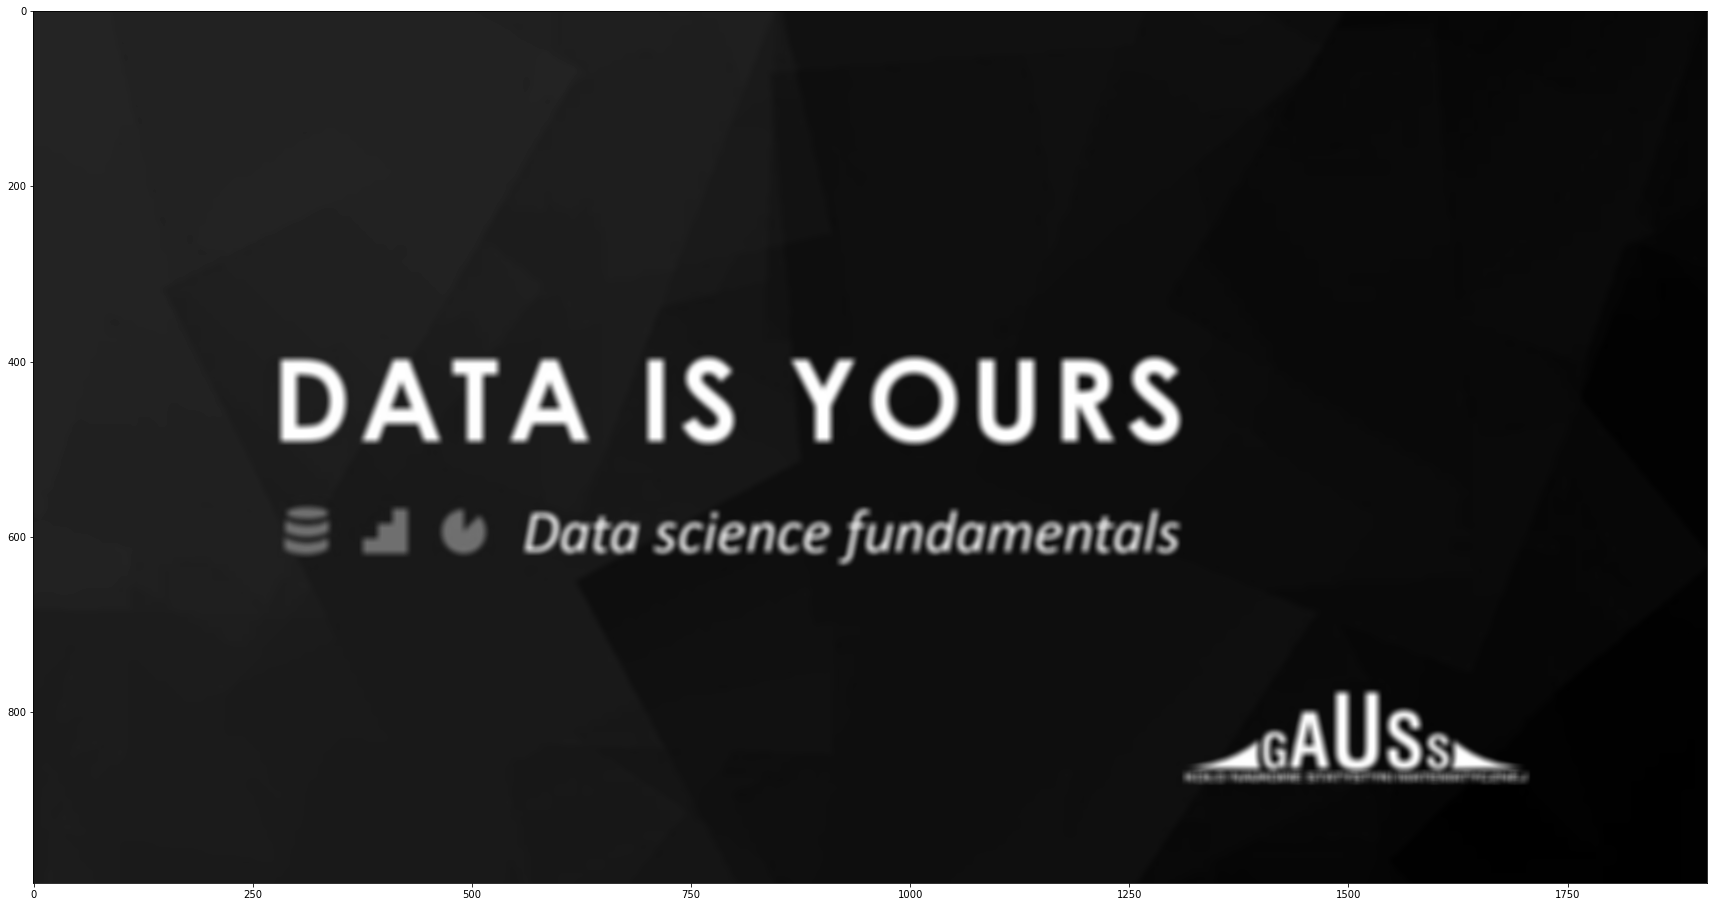

In [118]:
plt.imshow(smooth)

# Linear Algebra

In [119]:
np.linalg.norm(np.ones(3))

1.7320508075688772

$$\begin{cases}
a_{11}x_1+a_{12}x_2+\cdots+a_{1n}&=y_1\\
a_{21}x_1+a_{22}x_2+\cdots+a_{2n}&=y_2\\
\vdots&\vdots\\
a_{n1}x_1+a_{n2}x_2+\cdots+a_{nn}&=y_n\\
\end{cases}$$

$$Ax=y\Rightarrow x=A^{-1}y$$

In [120]:
A = np.random.randn(3, 3)
y = np.random.randn(3)

In [121]:
np.linalg.inv(A) @ y

array([  0.14855645,   4.11904132, -12.43254427])

In [122]:
np.linalg.solve(A, y)

array([  0.14855645,   4.11904132, -12.43254427])

$$A=Q\Lambda Q^{-1}$$\\
$$\Lambda=\begin{bmatrix}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&0\\0&0&\cdots&\lambda_n\end{bmatrix}$$

In [123]:
eig_val, eig_vec = np.linalg.eig(A)

In [124]:
np.linalg.norm(eig_vec @ np.diag(eig_val) @ np.linalg.inv(eig_vec) - A)

1.7565683487706336e-15

# Broadcast

In [125]:
relu = lambda x: max(0, x)
relu(np.arange(-10, 10))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [126]:
relu_vec = np.vectorize(relu)
relu_vec(np.arange(-10, 10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [127]:
relu_vec(np.random.randn(4, 5))

array([[1.40827029, 0.        , 0.        , 0.        , 0.70854832],
       [0.        , 0.        , 0.47745895, 0.        , 1.3394251 ],
       [2.38026015, 0.        , 0.        , 1.71477917, 0.94803998],
       [0.16978997, 0.        , 0.        , 0.        , 0.        ]])

In [128]:
np.diff(np.arange(10))

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [132]:
np.apply_along_axis(np.diff, 1, np.array([np.arange(0, i * 5, i) for i in range(1, 4)]))

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [130]:
np.array([np.arange(0, i * 5, i) for i in range(1, 4)])

array([[ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

#### Exercise: Create red-to-blue gradient

In [134]:
row = lambda i: np.ones(256) * i
grad = np.vectorize(row, signature='()->(n)')(np.arange(256))

In [135]:
grad

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ...,
       [253., 253., 253., ..., 253., 253., 253.],
       [254., 254., 254., ..., 254., 254., 254.],
       [255., 255., 255., ..., 255., 255., 255.]])

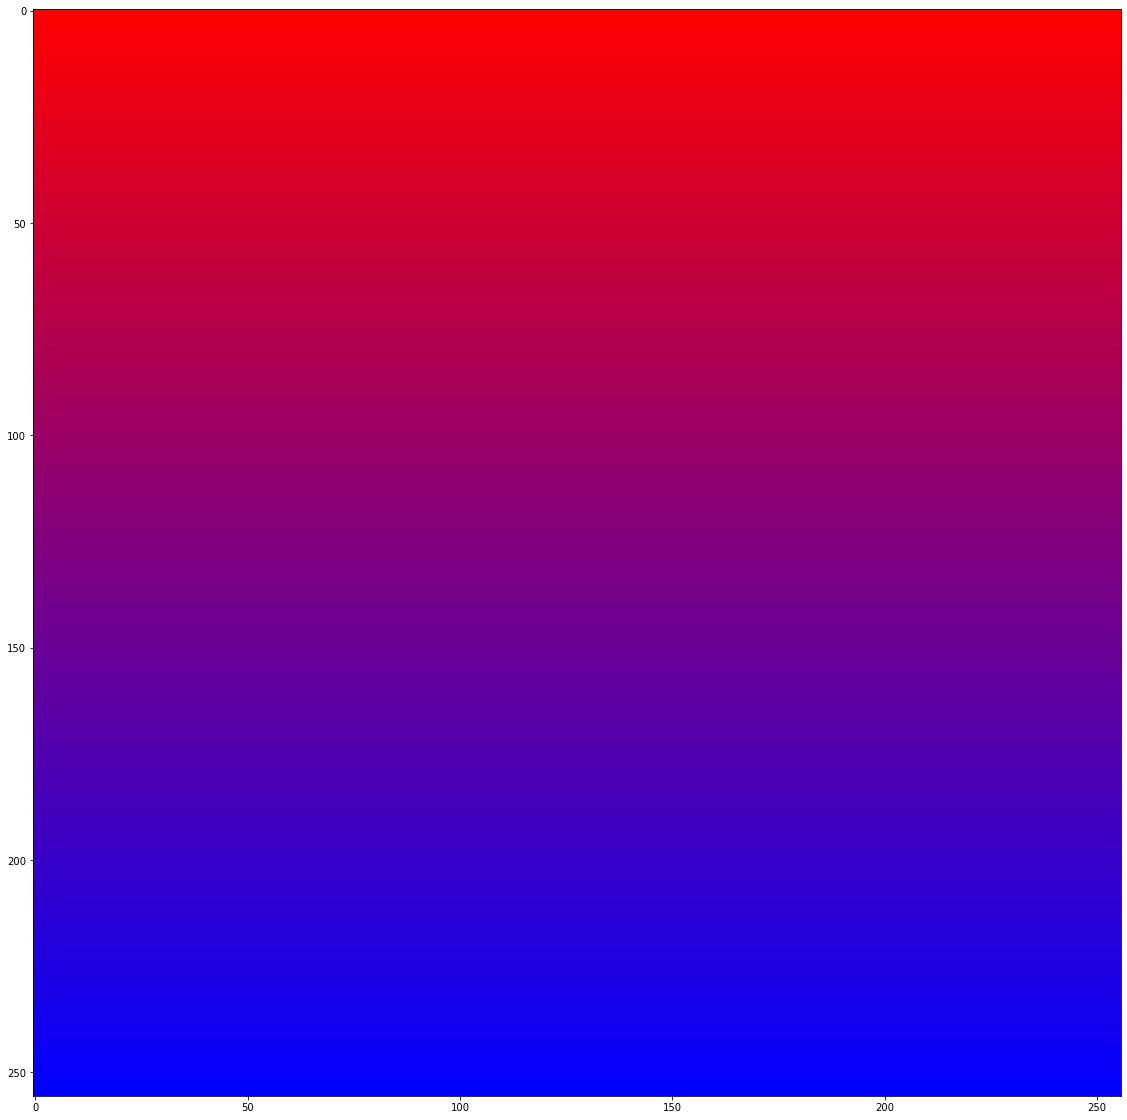

In [137]:
color = lambda value: np.array([255 - value, 0, value])
plt.imshow(np.vectorize(color, signature='()->(n)')(grad).astype(int))